In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('/home/martin/datasets/flights.csv')
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


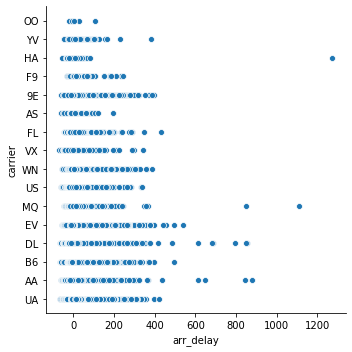

In [21]:
df = df[:100000]
sns.relplot(x="arr_delay", y="carrier", data=df)

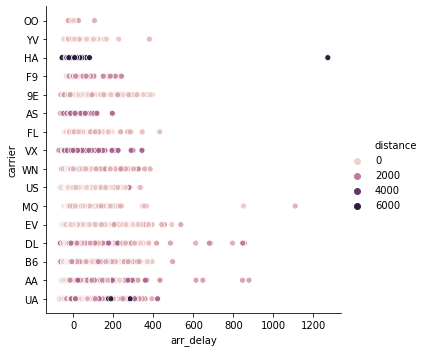

In [22]:
sns.relplot(x="arr_delay", y="carrier", hue='distance', data=df)

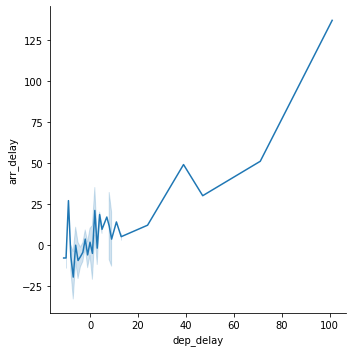

In [14]:
sns.relplot(x="dep_delay", y="arr_delay", data=df[:150], kind="line")

In [1]:
from scipy import stats

In [6]:
c = np.random.normal(loc=5, size=100, scale=2)

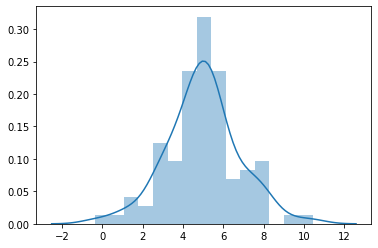

In [7]:
sns.distplot(c)

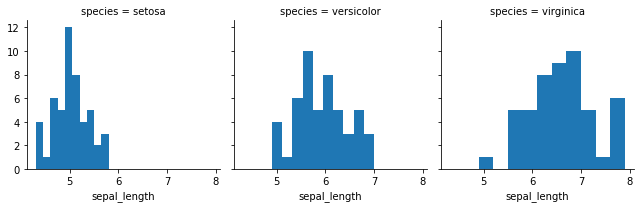

In [8]:
a = sns.load_dataset('iris')
b = sns.FacetGrid(a, col="species")
b.map(plt.hist, "sepal_length")

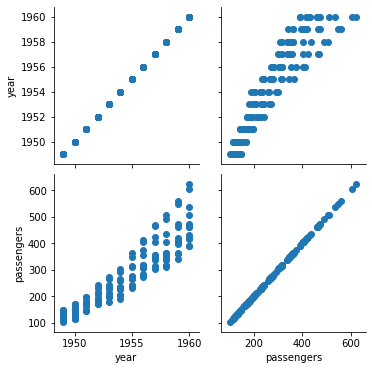

In [9]:
a=sns.load_dataset('flights')
b=sns.PairGrid(a)
b.map(plt.scatter)

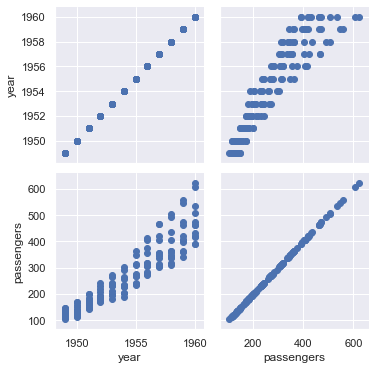

In [10]:
sns.set(style="darkgrid")
a=sns.load_dataset('flights')
b=sns.PairGrid(a)
b.map(plt.scatter)

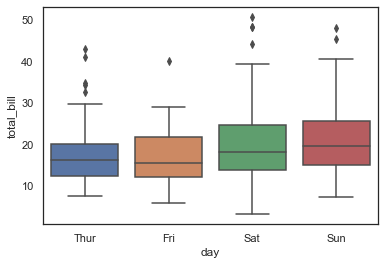

In [11]:
sns.set(style="white", color_codes=True)
a=sns.load_dataset('tips')
sns.boxplot(x="day", y="total_bill", data=a)

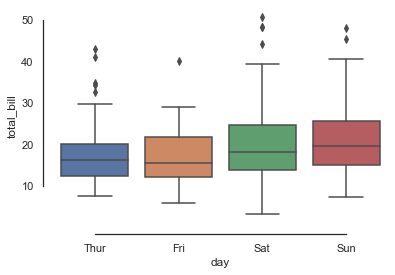

In [12]:
sns.set(style="white", color_codes=True)
a=sns.load_dataset('tips')
sns.boxplot(x="day", y="total_bill", data=a)
sns.despine(offset=10, trim=True)

In [13]:
c = sns.color_palette()

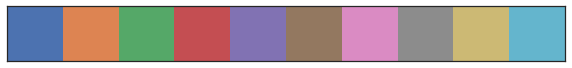

In [14]:
sns.palplot(c)